In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# functions for visualising prob contours from parameters of feature expansion.

def plot_data_internal_2(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), \
        np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
#     ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
#     ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
#     plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

def plot_predictive_distribution_2(X, y, predict, w, label):
    xx, yy = plot_data_internal_2(X, y)     
    # When xx is ravelled, it will become a 1D array with repeated entries ranging from x_min to x_max.
    # length = no of points in the grid = 100**2
    
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)), \
        yy.ravel().reshape((-1, 1))), 1)
#     print(X_predict.shape)
    # X_predict is a (100**2)x2 array where each row represents a point on the x1-x2 grid
    
    Z = predict(X_predict, w)  # predict_for_plot will compute the sigmal (class prob) for each point on the grid.
#     print(Z.shape)
    
    Z = Z.reshape(xx.shape)
#     print(Z.shape)
    
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.title('Plot data ({})'.format(label))
    plt.show()

<Figure size 432x288 with 0 Axes>

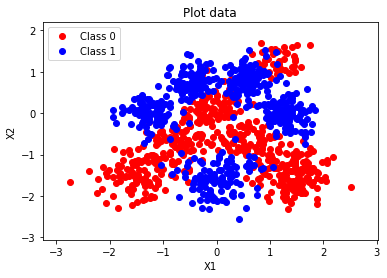

In [5]:
# visualise the available datasets with corresponding classes.

# Load data
X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), \
        np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 0')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 1')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
#     print(xx, '\n\n' ,yy)
    plt.show()
    
# plt.tight_layout()
plot_data(X,y)

# plt.savefig('raw_data.jpg')

In [4]:
ones = np.ones((X.shape[0], 1))
# print(ones.shape)
X_biased = np.concatenate((ones, X), axis = 1)
print(X_biased)

[[ 1.         -0.62294615 -0.57879556]
 [ 1.          1.09961316  1.55006583]
 [ 1.          0.75478522 -1.97615881]
 ...
 [ 1.          1.30638865 -1.49208208]
 [ 1.         -0.83034342 -0.39914968]
 [ 1.          0.10075642 -0.94794689]]


In [5]:
# Split data into training and test sets.

from sklearn.model_selection import train_test_split

def append_ones(X):
    ones = np.ones((X.shape[0], 1))
    X_biased = np.concatenate((ones, X), axis = 1)
    return X_biased

X_biased = append_ones(X)

X_train, X_test, y_train, y_test = train_test_split(X_biased, y, 
                                                    test_size=0.2, random_state=2019,
                                                    stratify=y)

print(X_train)

[[ 1.          0.24659315 -1.3530979 ]
 [ 1.          1.41677122  0.44305545]
 [ 1.          0.21236303  0.01226163]
 ...
 [ 1.          0.48840956  0.87364946]
 [ 1.         -0.53320507 -1.66131642]
 [ 1.          1.30162549 -0.27043895]]


In [6]:
# print(X_train.T)
# gradient = np.dot(X_train.T, (y_train - logistic(np.dot(X_train, w))))
# print(gradient)
# w = w + 0.001*gradient
# print(w)

w = [ 0.35100832 -0.07898342  0.86903519]


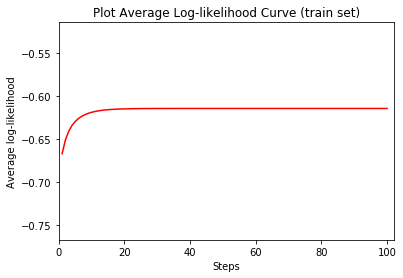

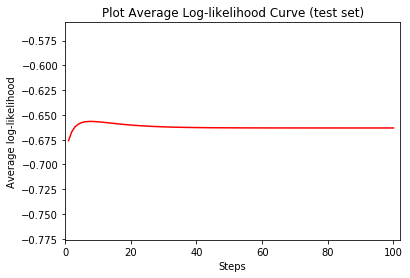

-0.6141123642970585
-0.6631676606955744


In [7]:
# implement logistic classification to train the parameters w.

##
# x: input to the logistic function
#

def logistic(x): 
    return 1.0 / (1.0 + np.exp(-x))

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# w: current parameter values
#

def compute_average_ll(X, y, w):
    output_prob = logistic(np.dot(X, w))
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


def gradient_ascent(X_train, y_train, X_test, y_test, w, l_rate = 0.001, epochs = 100):
    ll_train = []
    ll_test = []
    for n in range(epochs):
        # gradient should be the derivative of the log-likelihood.
        gradient = np.dot(X_train.T, (y_train - logistic(np.dot(X_train, w))))    # `gradient` is a vector with dimension same as an augmented input x~.
        w = w + l_rate*gradient
        ll_train.append(compute_average_ll(X_train, y_train, w))
        ll_test.append(compute_average_ll(X_test, y_test, w))
    return w, ll_train, ll_test

w = np.zeros(X_train.shape[1])
w, ll_train, ll_test = gradient_ascent(X_train, y_train, X_test, y_test, w)
print('w =', w)

##
# ll: 1d array with the average likelihood per data point and dimension equal
#     to the number of training epochs.
#

def plot_ll(ll, label):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve ({})'.format(label))
    plt.show()

plot_ll(ll_train, "train set")
plot_ll(ll_test, "test set")

print(ll_train[-1])
print(ll_test[-1])

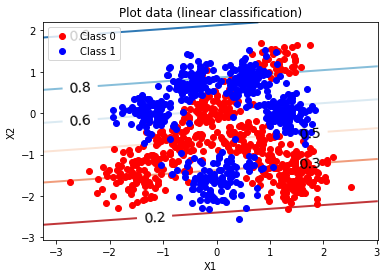

In [8]:
##
# x: 2d array with input features at which to compute predictions.
#
# (uses parameter vector w which is defined outside the function's scope)
#

def predict_for_plot(x, w): 
    x_tilde = np.concatenate((np.ones((x.shape[ 0 ], 1 )), x), 1)
    return logistic(np.dot(x_tilde, w))

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# predict: function that recives as input a feature matrix and returns a 1d
#          vector with the probability of class 1.

def plot_predictive_distribution(X, y, predict, w, label):
    xx, yy = plot_data_internal(X, y)     
    # When xx is ravelled, it will become a 1D array with repeated entries ranging from x_min to x_max.
    # length = no of points in the grid = 100**2
    
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)), \
        yy.ravel().reshape((-1, 1))), 1)
#     print(X_predict.shape)
    # X_predict is a (100**2)x2 array where each row represents a point on the x1-x2 grid
    
    Z = predict(X_predict, w)  # predict_for_plot will compute the sigmal (class prob) for each point on the grid.
#     print(Z.shape)
    
    Z = Z.reshape(xx.shape)
#     print(Z.shape)
    
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.title('Plot data ({})'.format(label))
    plt.show()


plot_predictive_distribution(X, y, predict_for_plot, w, "linear classification")

In [9]:
from sklearn.metrics import confusion_matrix

# Given the inputs X_test of the test set, and trained prediction parameters w, 
# prediction on the outputs y_test of the test set can be made as follows:
y_test_pred = np.dot(X_test, w)

thres = 0.5
y_test_pred = [i >= 0.5 for i in y_test_pred]    # elements in y_test_pred will become 1 if its value >=0.5

# The confusion matrix has row 1 corresponding to the no of data points in true class 0
# row 2 to the true class 1
# column 1 to the predicted class 0
# column 2 to the predicted class 1
print(confusion_matrix(y_test, y_test_pred))

unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

[[79 22]
 [55 44]]


{0.0: 101, 1.0: 99}

### feature-expanded inputs (l = 1) ###

In [10]:
# print(X)
# X2 = np.sum(X**2, 1)
# print(X2[0])
# print(X2.shape)

In [11]:
# Create a new matrix of feature-expanded inputs before splitting them into train and test sets.
# l=1

##
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions

def expand_inputs(l, X, Z):
    X2 = np.sum(X**2, 1)  # this returns an (1000x1) array with each element being (x1**2 + x2**2)
    Z2 = np.sum(Z**2, 1)  # Z2 is actually the same as X2, cuz the centre of each Gaussian is just each of the 1000 data points.
    ones_Z = np.ones(Z.shape[ 0 ])  
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)  # r2 is a (1000x1000) matrix.
    return np.exp(-0.5 / l**2 * r2)


Xb_train, Xb_test, yb_train, yb_test = train_test_split(X, y, test_size=0.2, random_state=2019, stratify=y)

(200, 801)
(801,)


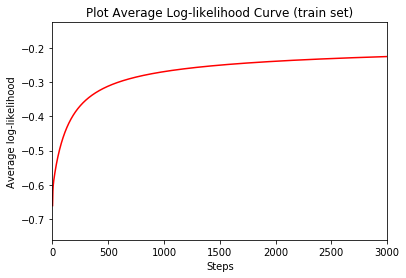

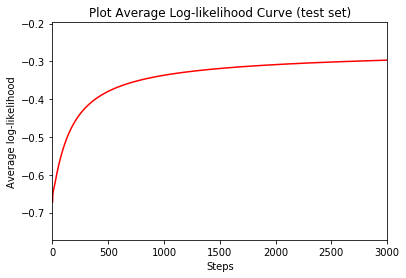

-0.22505940068716193
-0.29681504502746575


In [12]:
# train the logistic classification model on the expanded dataset (l=1)
l = 1
X1_train = append_ones(expand_inputs(l, Xb_train, Xb_train))
X1_test = append_ones(expand_inputs(l, Xb_test, Xb_train))
print(X1_test.shape)

w1 = np.zeros(X1_train.shape[1])
w1, ll1_train, ll1_test = gradient_ascent(X1_train, yb_train, X1_test, yb_test, w1, l_rate = 0.00005, epochs = 3000)
# print('w1 =', w1)
print(w1.shape)

plot_ll(ll1_train, "train set")
plot_ll(ll1_test, "test set")

print(ll1_train[-1])
print(ll1_test[-1])

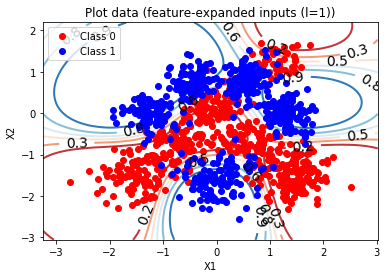

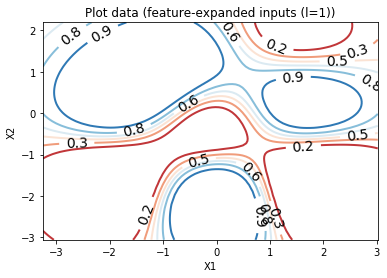

In [13]:
##
# x: 2d array with input features at which to compute the predictions
#    using the feature expansion
#
# (uses parameter vector w and the 2d array X with the centers of the basis
# functions for the feature expansion, which are defined outside the function's
# scope)
#

l = 1

def predict_for_plot_expanded_features(x, w):
    x_expanded = expand_inputs(l, x, Xb_train)
    x_tilde = np.concatenate((np.ones((x_expanded.shape[ 0 ], 1 )), x_expanded), 1)
    return logistic(np.dot(x_tilde, w))

def plot_predictive_distribution_2(X, y, predict, w, label):
    xx, yy = plot_data_internal_2(X, y)     
    # When xx is ravelled, it will become a 1D array with repeated entries ranging from x_min to x_max.
    # length = no of points in the grid = 100**2
    
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)), \
        yy.ravel().reshape((-1, 1))), 1)
#     print(X_predict.shape)
    # X_predict is a (100**2)x2 array where each row represents a point on the x1-x2 grid
    
    Z = predict(X_predict, w)  # predict_for_plot will compute the sigmal (class prob) for each point on the grid.
#     print(Z.shape)
    
    Z = Z.reshape(xx.shape)
#     print(Z.shape)
    
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.title('Plot data ({})'.format(label))
    plt.show()

plot_predictive_distribution(X, y, predict_for_plot_expanded_features, w1, "feature-expanded inputs (l=1)")
    
plot_predictive_distribution_2(X, y, predict_for_plot_expanded_features, w1, "feature-expanded inputs (l=1)")

In [14]:
y1_test_pred = np.dot(X1_test, w1)
# print(y1_test_pred)

thres = 0.5
y1_test_pred = [i >= 0.5 for i in y1_test_pred]    # elements in y_test_pred will become 1 if its value >=0.5.

print(confusion_matrix(yb_test, y1_test_pred))

[[89 12]
 [11 88]]


### feature-expanded inputs (l=0.1)

(200, 801)
(801,)


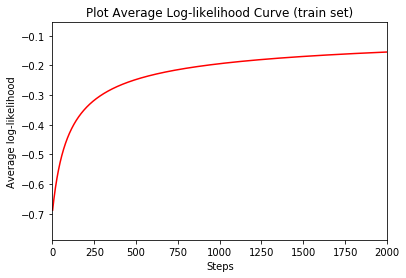

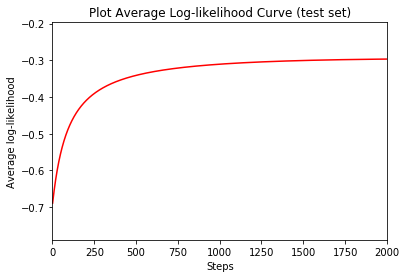

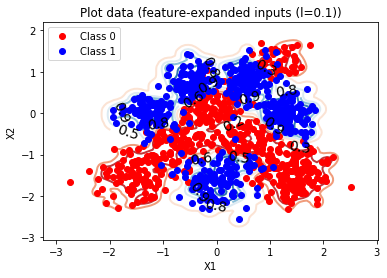

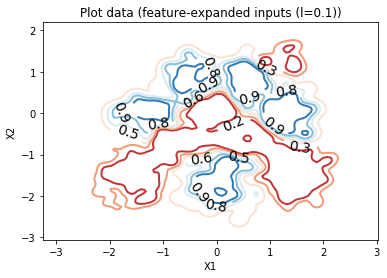

-0.15478464648734863
-0.2967463970786324


In [15]:
l=0.1
# X01_train, X01_test, y01_train, y01_test = train_test_split(X01_expanded, y, 
#                                                     test_size=0.2, random_state=2019,
#                                                     stratify=y)
X01_train = append_ones(expand_inputs(l, Xb_train, Xb_train))
X01_test = append_ones(expand_inputs(l, Xb_test, Xb_train))
print(X01_test.shape)

w01 = np.zeros(X01_train.shape[1])
w01, ll01_train, ll01_test = gradient_ascent(X01_train, yb_train, X01_test, yb_test, w01, l_rate = 0.0007, epochs = 2000)
# print('w01 =', w01)
print(w01.shape)

plot_ll(ll01_train, "train set")
plot_ll(ll01_test, "test set")

plot_predictive_distribution(X, y, predict_for_plot_expanded_features, w01, "feature-expanded inputs (l=0.1)")
plot_predictive_distribution_2(X, y, predict_for_plot_expanded_features, w01, "feature-expanded inputs (l=0.1)")

print(ll01_train[-1])
print(ll01_test[-1])

In [16]:
y01_test_pred = np.dot(X01_test, w01)
# print(y01_test_pred)

thres = 0.5
y01_test_pred = [i >= 0.5 for i in y01_test_pred]    # elements in y_test_pred will become 1 if its value >=0.5.

print(confusion_matrix(yb_test, y01_test_pred))

[[93  8]
 [14 85]]


### feature-expanded inputs (l=0.01)

-0.0524042625189705
-0.6624464045639045


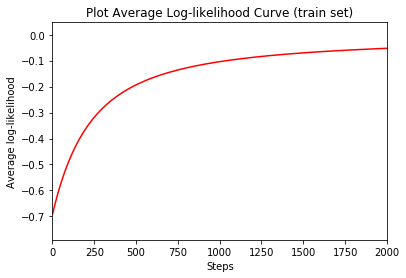

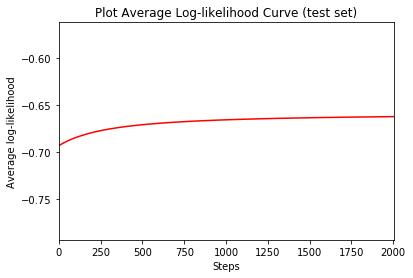

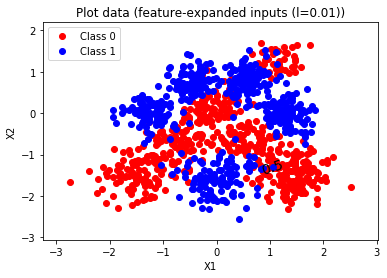

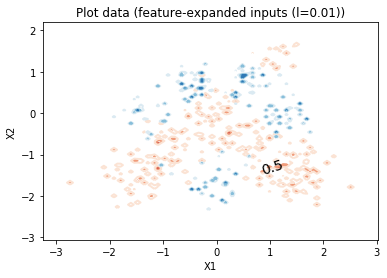

In [17]:
l=0.01
X001_train = append_ones(expand_inputs(l, Xb_train, Xb_train))
X001_test = append_ones(expand_inputs(l, Xb_test, Xb_train))

w001 = np.zeros(X001_train.shape[1])
w001, ll001_train, ll001_test = gradient_ascent(X001_train, yb_train, X001_test, yb_test, w001, l_rate = 0.01, epochs = 2000)
# print('w001 =', w001)
print(ll001_train[-1])
print(ll001_test[-1])

plot_ll(ll001_train, "train set")
plot_ll(ll001_test, "test set")

plot_predictive_distribution(X, y, predict_for_plot_expanded_features, w001, "feature-expanded inputs (l=0.01)")
plot_predictive_distribution_2(X, y, predict_for_plot_expanded_features, w001, "feature-expanded inputs (l=0.01)")

From the log-likelihood graphs above, it can be deduced that the parameters w have overfitted the train dataset. The log-likelihood of the training output is very high (-0.052, close to zero which means the likelihood prob is close to 1). In contrast the log-likelihood of the test output is significantly lower: -0.662.

The reason for this overfitting is the very small width of the radial basis function (l = 0.01). The RBF functions barely spread away from each training data point. Therefore, the probability contours only surround the training data points, as shown in the graph. When these probability contours are used to predict the class of the test data points, most of the data points do not lie within the contours and are hence predicted to belong to class 0. This is why the corresponding confusion matrix had all of the points predicted as class 0, about half of which are wrong predictions.

In [18]:
y001_test_pred = np.dot(X001_test, w01)


thres = 0.5
y001_test_pred = [i >= 0.5 for i in y001_test_pred]    # elements in y_test_pred will become 1 if its value >=0.5.
# print(y001_test_pred)
# unique, counts = np.unique(y001_test_pred, return_counts=True)
# dict001 = dict(zip(unique, counts))
# print(dict001)

print(confusion_matrix(yb_test, y001_test_pred))

# print(y001_test)

[[101   0]
 [ 99   0]]
